In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import os
for dirname, _, filenames in os.walk('plant-pathology-2020-fgvc7'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

plant-pathology-2020-fgvc7\sample_submission.csv
plant-pathology-2020-fgvc7\test.csv
plant-pathology-2020-fgvc7\train.csv
plant-pathology-2020-fgvc7\images\Test_0.jpg
plant-pathology-2020-fgvc7\images\Test_1.jpg
plant-pathology-2020-fgvc7\images\Test_10.jpg
plant-pathology-2020-fgvc7\images\Test_100.jpg
plant-pathology-2020-fgvc7\images\Test_1000.jpg
plant-pathology-2020-fgvc7\images\Test_1001.jpg
plant-pathology-2020-fgvc7\images\Test_1002.jpg
plant-pathology-2020-fgvc7\images\Test_1003.jpg
plant-pathology-2020-fgvc7\images\Test_1004.jpg
plant-pathology-2020-fgvc7\images\Test_1005.jpg
plant-pathology-2020-fgvc7\images\Test_1006.jpg
plant-pathology-2020-fgvc7\images\Test_1007.jpg
plant-pathology-2020-fgvc7\images\Test_1008.jpg
plant-pathology-2020-fgvc7\images\Test_1009.jpg
plant-pathology-2020-fgvc7\images\Test_101.jpg
plant-pathology-2020-fgvc7\images\Test_1010.jpg
plant-pathology-2020-fgvc7\images\Test_1011.jpg
plant-pathology-2020-fgvc7\images\Test_1012.jpg
plant-pathology-2020-fgv

In [3]:
train_csv= pd.read_csv('plant-pathology-2020-fgvc7/train.csv')
df = pd.read_csv('plant-pathology-2020-fgvc7/train.csv')

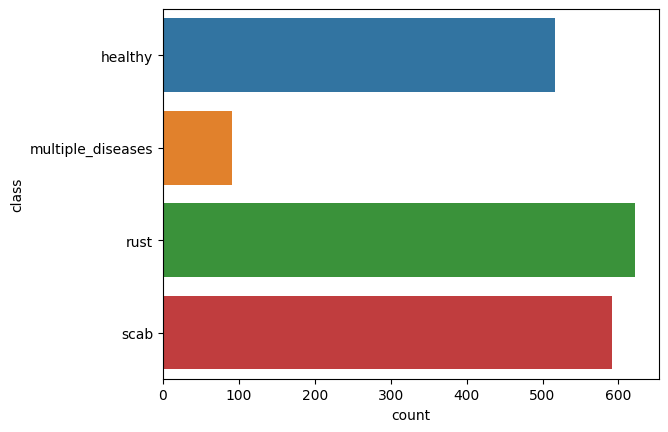

In [4]:
import seaborn as sns
# Create Class count dataframe
class_count = pd.DataFrame(df.sum(axis=0)).reset_index()
class_count=class_count.rename(columns={"index": "class", 0: "count"})
class_count.drop(class_count.index[0], inplace=True)
# Visualize class distribution as Barchartfig, ax= plt.subplots(figsize=(12,10))
sns.barplot(y="class", x="count",  data=class_count);

In [5]:
train_csv

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0
...,...,...,...,...,...
1816,Train_1816,0,0,0,1
1817,Train_1817,1,0,0,0
1818,Train_1818,1,0,0,0
1819,Train_1819,0,0,1,0


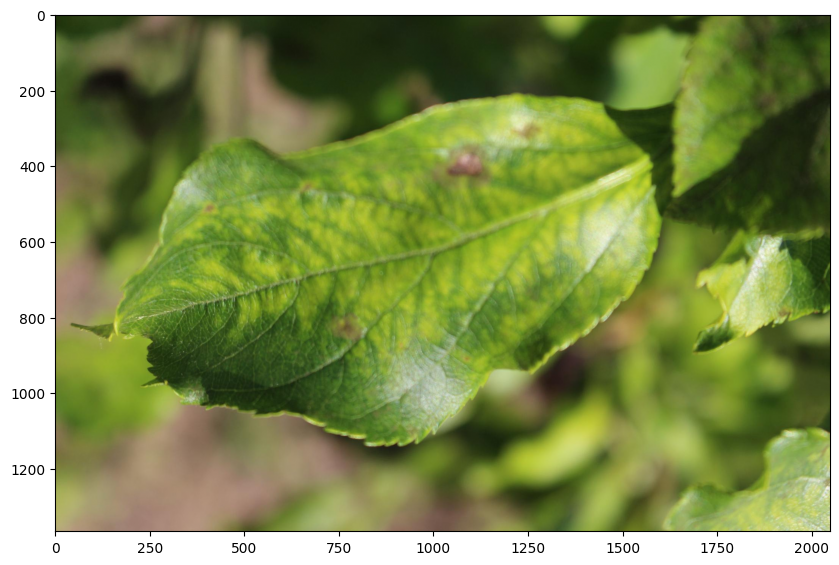

In [6]:
import matplotlib.pyplot as plt
img_array = plt.imread('plant-pathology-2020-fgvc7/images/Train_0.jpg')
fig = img_array/255
plt.figure(figsize=(10,10))
plt.imshow(fig)
plt.show()

In [7]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [9]:
import pandas as pd
import numpy as np

from fastai.vision import *
from fastai import *
from fastai.callback.all import *

import matplotlib.pyplot as plt
import seaborn as sns
import torch

ModuleNotFoundError: No module named 'fastai.callbacks'

In [ ]:
path = Path('plant-pathology-2020-fgvc7/')
img_path = Path('plant-pathology-2020-fgvc7/images')

In [ ]:
data_src = (ImageList.from_df(df=df, path=path, folder='images',suffix=".jpg").
            split_by_rand_pct(0.2)
            .label_from_df(cols=list(class_count['class']),  label_cls=MultiCategoryList, one_hot=True))

In [ ]:
data_src


In [ ]:
tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)
data = (data_src.transform(tfms, size=256).databunch().normalize(imagenet_stats))
data.show_batch(4)

In [ ]:
f_score = partial(fbeta, thresh=0.45)
learn = cnn_learner(data, models.resnet34, metrics=[accuracy_thresh, f_score],wd=1e-1, callback_fns=[CSVLogger,ShowGraph],path='/kaggle/working')

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(20, slice(7e-01))
learn.recorder.plot()

In [ ]:
img = open_image("/kaggle/input/plant-pathology-2020-fgvc7/images/Test_487.jpg")
img

In [ ]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

In [22]:
import pandas as pd
import numpy as np
from fastai.vision.all import *
import matplotlib.pyplot as plt
import seaborn as sns
import torch

In [23]:
path = Path('plant-pathology-2020-fgvc7/')
img_path = path/'images'

In [24]:
df = pd.read_csv(path/'train.csv')

In [27]:
df['labels'] = df.iloc[:, 1:].apply(lambda x: ' '.join(x.index[x==1].tolist()), axis=1)

In [28]:
# 设置数据源
dblock = DataBlock(
    blocks=(ImageBlock, MultiCategoryBlock),
    get_x=ColReader('image_id', pref=img_path, suff='.jpg'),
    get_y=ColReader('labels', label_delim=' '),
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    item_tfms=Resize(256),
    batch_tfms=aug_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)
)

dls = dblock.dataloaders(df, bs=64)

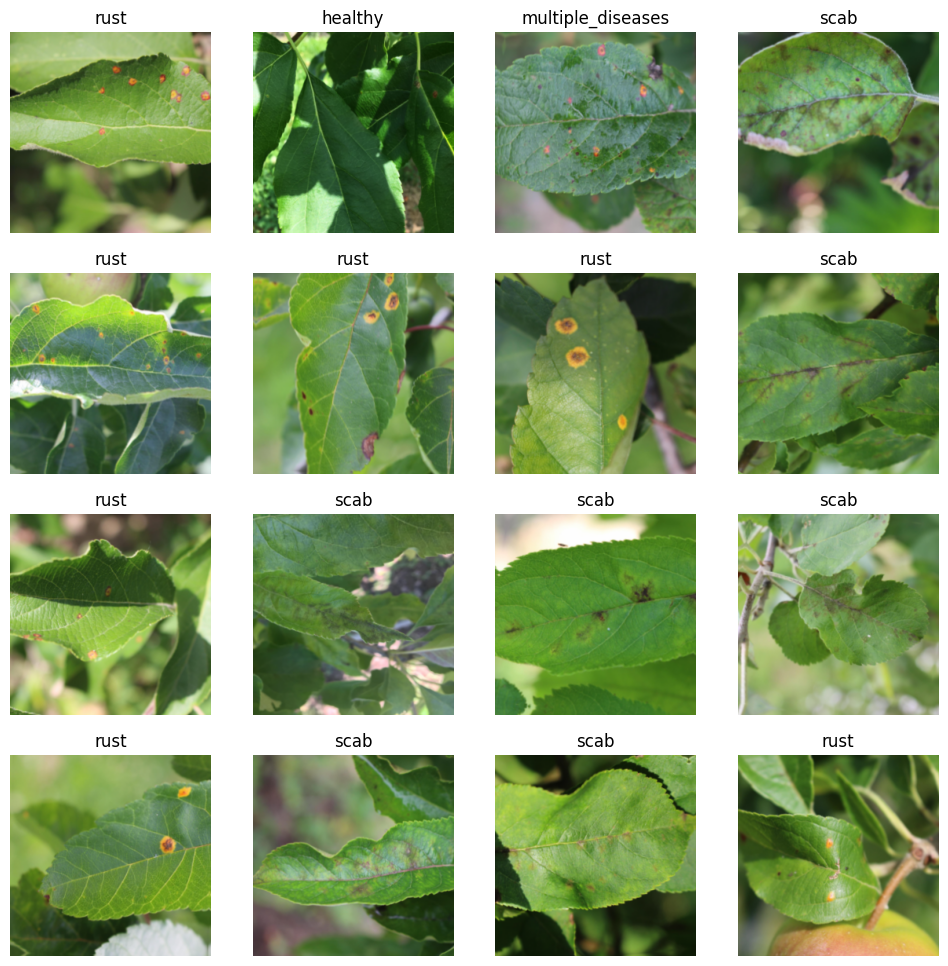

In [30]:
# 展示批量数据
dls.show_batch(max_n=16, figsize=(12, 12))

In [34]:
metrics = [accuracy_multi]
f_score = FBetaMulti(average='macro', beta=2, thresh=0.45)
metrics.append(f_score)

In [35]:
# 创建学习器
learn = cnn_learner(dls, resnet34, metrics=metrics, cbs=[CSVLogger(fname='history'), ShowGraphCallback()], wd=1e-1)

C:\Users\20887\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastai\vision\learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to C:\Users\20887/.cache\torch\hub\checkpoints\resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:11<00:00, 7.29MB/s]


AttributeError: 'Sequential' object has no attribute 'plot'

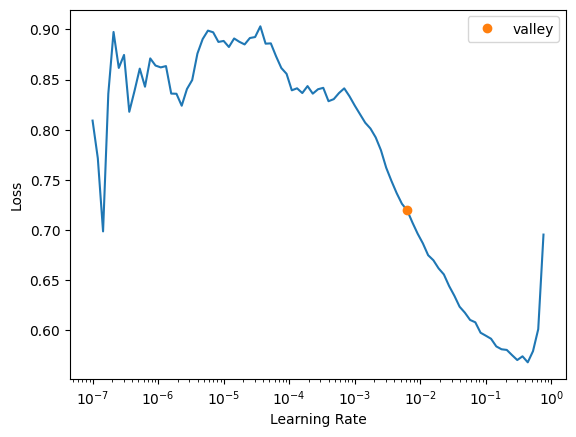

In [37]:
# 查找学习率
learn.lr_find()
learn.recorder.plot()

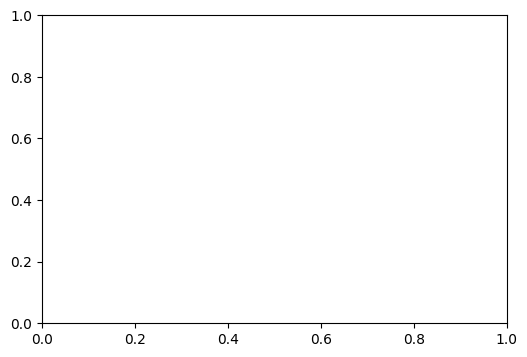

KeyboardInterrupt: 

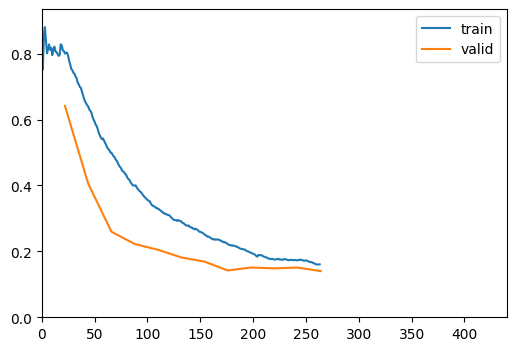

In [38]:
# 训练模型
learn.fit_one_cycle(20, slice(7e-3))

In [ ]:
# 预测
img = PILImage.create("plant-pathology-2020-fgvc7/images/Test_487.jpg")
preds, _ = learn.predict(img)
print(preds)